In [25]:
import shapely
import geopandas
import pathlib
import numpy
import OSMPythonTools
import OSMPythonTools.api
import OSMPythonTools.overpass

In [48]:
basepath = pathlib.Path(r"C:\Users\pearsonra\Documents\data\drain_detection\catchments")
crs=2193
drain_width = 5

# Functions

In [40]:
def create_path(basepath: pathlib.Path, name: str) -> pathlib.Path:
    catchment_path = (basepath / name)
    catchment_path.mkdir(parents=True, exist_ok=True)
    return catchment_path

In [41]:
def create_catchment(x0: float, y0: float, x1: float, y1: float,
                     catchment_path: pathlib.Path) -> geopandas.GeoDataFrame:
    catchment = geopandas.GeoDataFrame(geometry=[shapely.geometry.Polygon([[x0, y0], [x1, y0], [x1, y1], [x0, y1]])], crs=crs)
    
    catchment.to_file(catchment_path / "catchment.geojson")
    return catchment

In [56]:
def download_drains(catchment: geopandas.GeoDataFrame, drain_width: float,
                   catchment_path: pathlib.Path) -> geopandas.GeoDataFrame:
    bbox_lat_long = catchment.to_crs('EPSG:4326').bounds
    # create query
    query = OSMPythonTools.overpass.overpassQueryBuilder(
        bbox=[bbox_lat_long.miny[0],
              bbox_lat_long.minx[0],
              bbox_lat_long.maxy[0],
              bbox_lat_long.maxx[0]], 
        elementType='way', selector='waterway',
        out='body', includeGeometry=True)
    overpass = OSMPythonTools.overpass.Overpass()
    rivers = overpass.query(query)
    element_dict = {
        'geometry': [],
        'OSM_id': [],
        'waterway': [],
        'tunnel': [],
    }

    for element in rivers.elements():
        element_dict['geometry'].append(element.geometry())
        element_dict['OSM_id'].append(element.id())
        element_dict['waterway'].append(element.tags()['waterway'])
        element_dict['tunnel'].append('tunnel' in element.tags().keys())
    drains = geopandas.GeoDataFrame(element_dict, crs='EPSG:4326').to_crs('EPSG:2193')
    drains = drains[numpy.logical_not(drains['waterway'] == 'river')]
    drains = drains.clip(catchment)
    drains.to_file(catchment_path / "drains.geojson")
    drains.buffer(drain_width).to_file(catchment_path / f"drains_{drain_width}m.geojson")
    return drains

# Kiaipoi
Create and save a catchment file and download and save drains in the catchment

In [57]:
name = "kiaipoi"
x0 = 1556700
y0 = 5204450
x1 = 1571700
y1 = 5193450

Create and save catchment

In [60]:
catchment_path = create_path(basepath, name)
catchment = create_catchment(x0=x0, y0=y0, x1=x1, y1=y1, catchment_path=catchment_path)
drains = download_drains(catchment=catchment, drain_width=drain_width, catchment_path=catchment_path)

C:\Users\pearsonra\Anaconda3\envs\geofabrics\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\pearsonra\Anaconda3\envs\geofabrics\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\pearsonra\Anaconda3\envs\geofabrics\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Query OSM

In [37]:
drains = download_drains(catchment=catchment)

<AxesSubplot:>

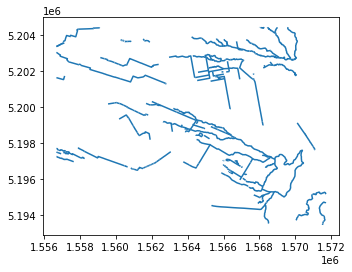

In [38]:
drains.plot()

# Leeston

In [39]:
name = "leeston"
x0 = 1525600
y0 = 5159800
x1 = 1538600
y1 = 5147800

In [61]:
catchment_path = create_path(basepath, name)
catchment = create_catchment(x0=x0, y0=y0, x1=x1, y1=y1, catchment_path=catchment_path)
drains = download_drains(catchment=catchment, drain_width=drain_width, catchment_path=catchment_path)

C:\Users\pearsonra\Anaconda3\envs\geofabrics\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\pearsonra\Anaconda3\envs\geofabrics\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\pearsonra\Anaconda3\envs\geofabrics\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
